<a href="https://colab.research.google.com/github/DavidMercadoFaustino/curso_ds_awari/blob/master/curso_ds_awari/Webscraping_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Webscraping

In [ ]:
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
indice_pagina_ml = list(range(1,1970,48))

In [ ]:
indice_pagina_ml[:20]

[1,
 49,
 97,
 145,
 193,
 241,
 289,
 337,
 385,
 433,
 481,
 529,
 577,
 625,
 673,
 721,
 769,
 817,
 865,
 913]

In [ ]:
indice_zonas = ['sao-paulo-zona-sul','sao-paulo-zona-norte','sao-paulo-zona-leste','sao-paulo-zona-oeste','santo-andre','campinas','guarulhos','ribeirao-preto','sao-bernardo-do-campo']

In [ ]:
lista_zona = []
lista_precos = []
quartos = []
areas = []
conteudo = []
for z in indice_zonas: 
  for n in indice_pagina_ml:
    conteudo = requests.get(f'https://imoveis.mercadolivre.com.br/casas/aluguel/sao-paulo/{z}/_Desde_{n}').content
    sopa = BeautifulSoup(conteudo)
    precos = sopa.find_all('span', class_='price__fraction')
    areas_e_quartos = sopa.find_all('div', class_='item__attrs')
    for padrao in precos:
      preco = re.findall('<span class="price__fraction">(.*)</span>', str(padrao))
      lista_precos.append(preco[0])
    for elemento in areas_e_quartos:
      area = re.findall('> (.*) m²', str(elemento))
      if area==[]:
        area=np.nan
        areas.append(area)
      else:
        areas.append(area[0])
    for elemento in areas_e_quartos:
      quarto = re.findall('\| (.*) quarto', str(elemento))
      if quarto==[]:
        quarto=np.nan
        quartos.append(quarto)
      else:
        quartos.append(quarto[0])
  
  while len(lista_zona)< len(lista_precos):
     lista_zona.append(z)





In [ ]:
len(lista_precos)

16636

In [ ]:
len(quartos)


16636

In [ ]:
len(areas)

16636

In [ ]:
len(lista_zona)

16636

In [ ]:
dados = {'Zona': lista_zona,
'area': areas,
'quartos': quartos, 'aluguel':lista_precos}

In [ ]:
df = pd.DataFrame(dados)

In [ ]:
df.dtypes

Zona       object
area       object
quartos    object
aluguel    object
dtype: object

In [ ]:
df['aluguel'] = [x.replace(".", "") for x in df["aluguel"]]

In [ ]:
df['aluguel'] = pd.to_numeric(df['aluguel'])

In [ ]:
df['area'] = pd.to_numeric(df['area'],downcast='integer')

In [ ]:
df['quartos'] = pd.to_numeric(df['quartos'],downcast='integer')

In [ ]:
df.dtypes

Zona        object
area       float64
quartos    float64
aluguel      int64
dtype: object

In [ ]:
df.isna().sum()

Zona          0
area        782
quartos    2839
aluguel       0
dtype: int64

In [ ]:
df.head()

,Zona,area,quartos,aluguel
0,sao-paulo-zona-sul,30.0,1.0,700
1,sao-paulo-zona-sul,90.0,2.0,1700
2,sao-paulo-zona-sul,30.0,1.0,600
3,sao-paulo-zona-sul,40.0,1.0,850
4,sao-paulo-zona-sul,20.0,1.0,500


In [ ]:
df.describe()

,area,quartos,aluguel
count,15854.000000,13797.000000,1.663600e+04
mean,272.990791,2.883743,1.824312e+04
std,3107.991997,1.467872,3.048517e+05
min,1.000000,0.000000,2.500000e+02
25%,100.000000,2.000000,1.700000e+03
50%,180.000000,3.000000,3.200000e+03
75%,300.000000,3.000000,6.000000e+03
max,300060.000000,36.000000,3.500000e+07


In [ ]:
 np.percentile(df['aluguel'], 90)

12000.0

In [ ]:
df = df.drop(columns=['area-binned'])

In [ ]:
df.head()

,Zona,area,quartos,aluguel
0,sao-paulo-zona-sul,30.0,1.0,700
1,sao-paulo-zona-sul,90.0,2.0,1700
2,sao-paulo-zona-sul,30.0,1.0,600
3,sao-paulo-zona-sul,40.0,1.0,850
4,sao-paulo-zona-sul,20.0,1.0,500


In [ ]:
df = df.loc[df['aluguel']<(np.percentile(df['aluguel'], 90))]

In [ ]:
df.describe()

,area,quartos,aluguel
count,14165.000000,12566.000000,14931.000000
mean,238.909283,2.752029,3540.428036
std,3264.405570,1.280772,2514.624886
min,1.000000,0.000000,250.000000
25%,90.000000,2.000000,1500.000000
50%,160.000000,3.000000,2900.000000
75%,250.000000,3.000000,5000.000000
max,300060.000000,36.000000,11950.000000


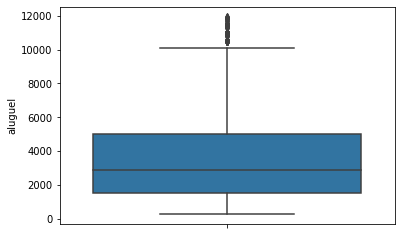

In [ ]:
sns.boxplot(y='aluguel',data=df)

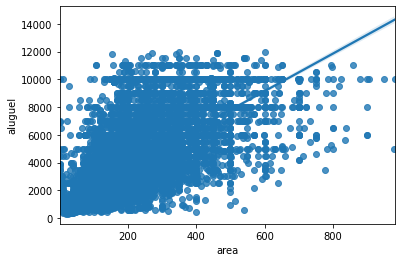

In [ ]:
sns.regplot(x='area',y='aluguel',data=df)


In [ ]:
max(df['area'])

980.0

In [ ]:
df = df.loc[df['area']<1000]